# Author - Khushi Jain

## Task 5: Exploratory Data Analysis - Sports
* Performed ‘Exploratory Data Analysis’ on dataset Indian Premier League.
* Conclude most successful teams, players and factors contributing win or loss of a team.
* Suggest teams or players a company should endorse for its products.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')


plt.rcParams['figure.figsize']=[15,8]

In [2]:
# Loading the dataset
matches=pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries=pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
merge = pd.merge(deliveries,matches,left_on='match_id',right_on='id')
merge.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [5]:
print("============================================")
print("size of matches dataset : ",matches.shape )
print("============================================")
print("size of deliveries dataset : ",deliveries.shape )
print("============================================")
print("size of merge dataset : ",merge.shape )
print("============================================")

size of matches dataset :  (756, 18)
size of deliveries dataset :  (179078, 21)
size of merge dataset :  (179078, 39)


In [6]:
print(matches.info())
print('***********************************************************')
print(deliveries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

## EDA of Matches dataset

statistical analysis of matches

In [7]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [8]:
matches.describe(include='all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,NaN,Mumbai,2011-04-17,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,Nitin Menon
freq,NaN,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,1792.178571,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3464.478148,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,189.750000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,378.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,567.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


## Handling Missing Values

In [9]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

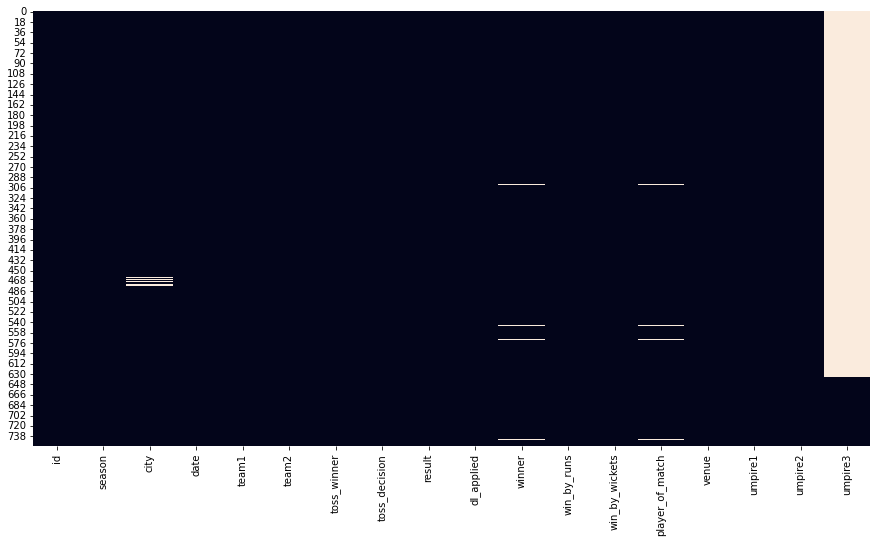

In [10]:
sns.heatmap(matches.isnull(),cbar=False)
plt.show()

* Columns "city", "winner", "player_of_match", "umpire1", "umpire2" have missing values.
* Here "umpire3" column has maximum number of missing value present. So we should delete that column from the dataframe.

In [11]:
# drop "umpire3" column
matches.drop(["umpire3"],axis=1,inplace=True)

In [12]:
# Handling Missing Values in "city" column
matches[matches['city'].isnull()][['city','venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


As all missing values are from "Dubai International Cricket Stadium". So we can fill the missing value by "Dubai".

In [13]:
matches["city"] = matches["city"].fillna("Dubai")

* In matches_df "player_of_match", "umpirr1", and "umpire2" has 4,2,2 numbers of missing value. So we can delete these rows having missing values.

In [14]:
# delete rows having missing value in columns 'umpire1', 'umpire2', 'player_of_match'.
matches.dropna(subset=['umpire1', 'umpire2', 'player_of_match'],inplace=True)

In [15]:
# shape of updated matches_df DataFrame
matches.shape

(750, 17)

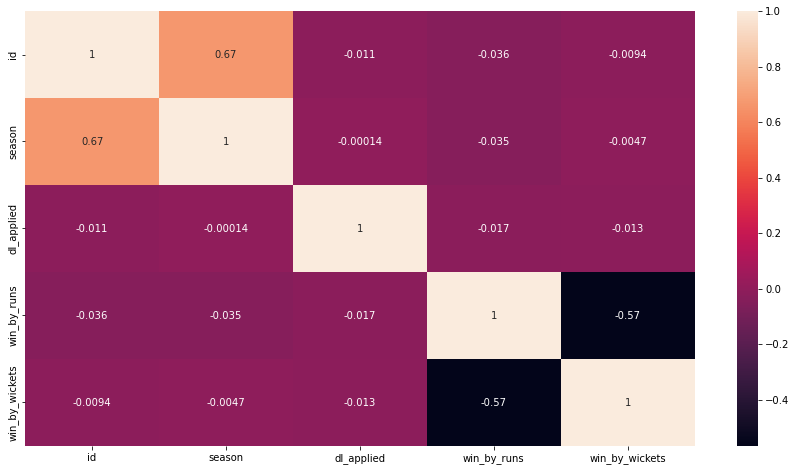

In [16]:
sns.heatmap(matches.corr(),annot=True)
plt.show()

## EDA of Deliveries Dataset

In [17]:
deliveries.describe()


,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [19]:
deliveries.describe(include='all')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
count,179078.000000,179078.000000,179078,179078,179078.000000,179078.000000,179078,179078,179078,179078.000000,...,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,8834,8834,6448
unique,NaN,NaN,15,15,NaN,NaN,516,511,405,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487,9,499
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SK Raina,caught,MS Dhoni
freq,NaN,NaN,22619,22517,NaN,NaN,4211,4173,3451,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162,5348,159
mean,1802.252957,1.482952,NaN,NaN,10.162488,3.615587,NaN,NaN,NaN,0.000452,...,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,NaN,NaN,NaN
std,3472.322805,0.502074,NaN,NaN,5.677684,1.806966,NaN,NaN,NaN,0.021263,...,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,190.000000,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,379.000000,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,567.000000,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


## Handling Missing Values

In [20]:
deliveries.isnull().sum()/len(deliveries)*100

match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
is_super_over        0.000000
wide_runs            0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
player_dismissed    95.066954
dismissal_kind      95.066954
fielder             96.399334
dtype: float64

* Here we can see column "player_dismissed", "dismissal_kind", "fielder" have maximum(more than 90%) number of missing value present.
* So we should delete these columns.

In [21]:
# drop columns "player_dismissed","dismissal_kind","fielder" from the DataFrame
deliveries.drop(columns=["player_dismissed","dismissal_kind","fielder"],axis=1,inplace=True)

In [22]:
# check for any missing value in deliveries_df
deliveries.isnull().sum().sum()

0

In [23]:
# check for any missing value in matches_df
matches.isnull().sum().sum()

0

## Number of Teams Participated Each Season

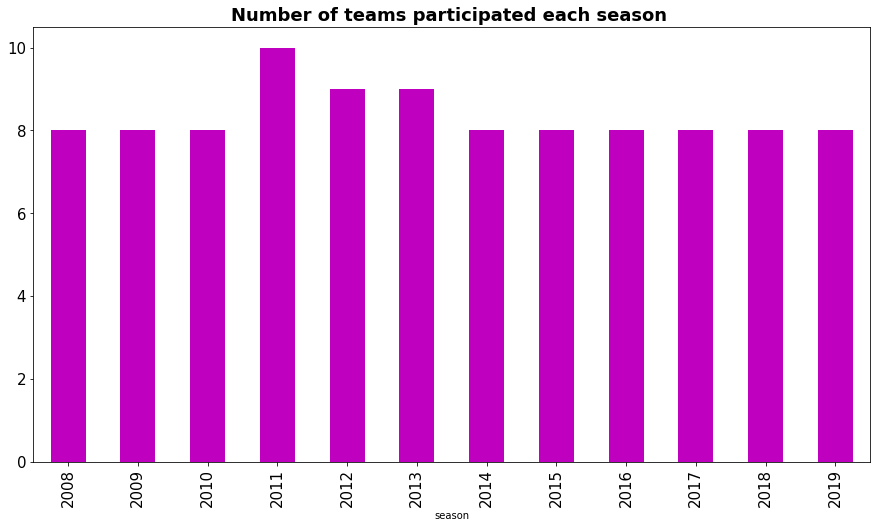

In [24]:
matches.groupby('season')['team1'].nunique().plot(kind = 'bar',color='m')
plt.title("Number of teams participated each season ",fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

## Matches Played in Each Season

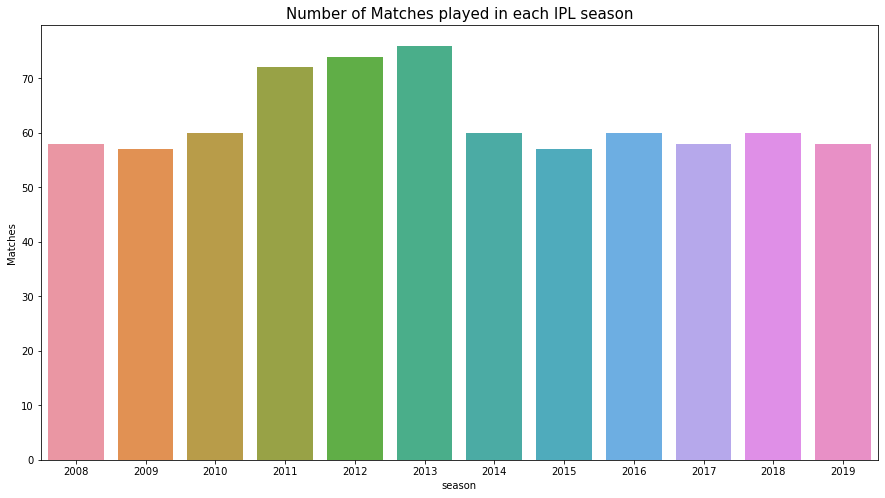

In [26]:
sns.countplot('season',data=matches)
plt.title("Number of Matches played in each IPL season",fontsize=15)
plt.xlabel("season")
plt.ylabel('Matches')
plt.show() 


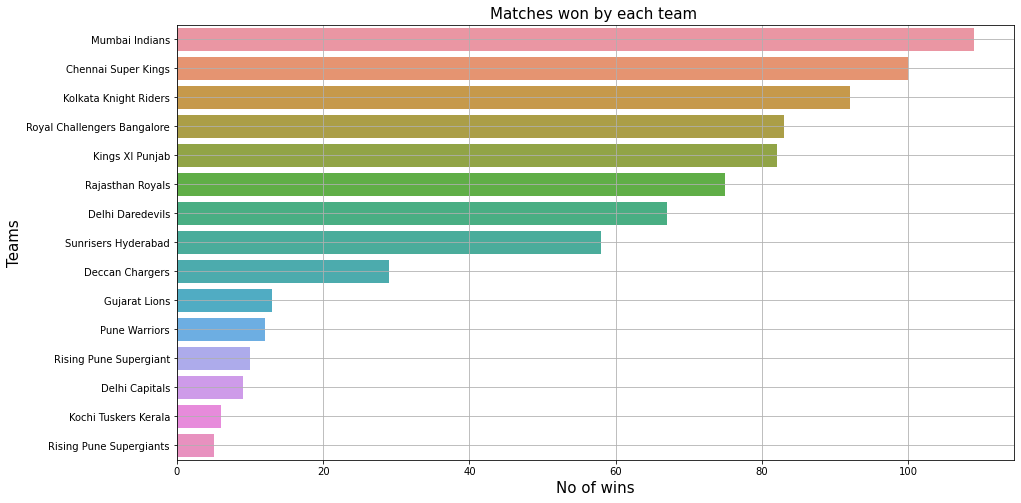

In [27]:
data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.title("Matches won by each team ",fontsize=15)
plt.ylabel("Teams",fontsize=15)
plt.xlabel("No of wins",fontsize=15)
plt.grid()
plt.show()

* Mumbai Indians wins maximum matches followed by Chennai Super Kings

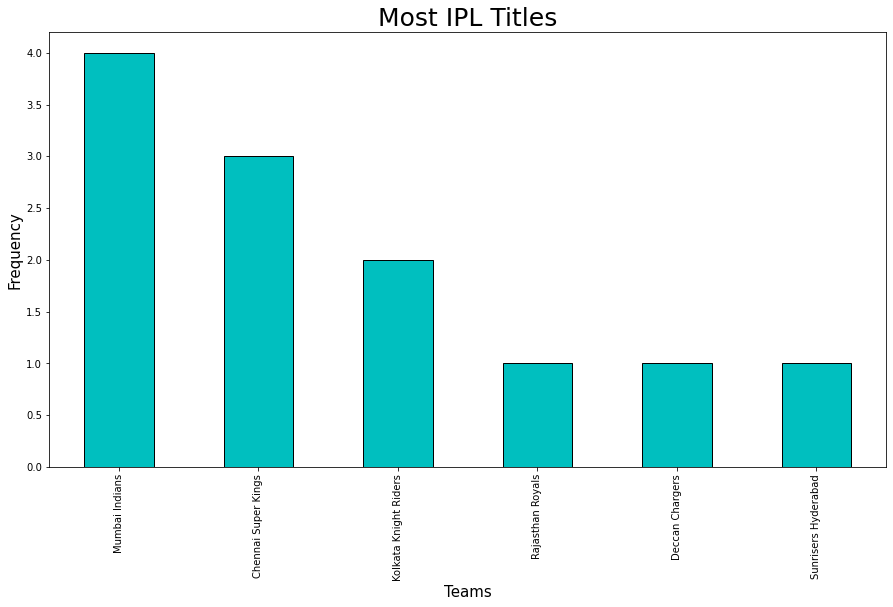

In [28]:
winning_team = {}
for i in sorted(matches.season.unique()):
    winning_team[i] = matches[matches.season == i]['winner'].tail(1).values[0]
    
ipl_winners = pd.Series(winning_team)
ipl_winners = pd.DataFrame(ipl_winners, columns=['team'])



ipl_winners['team'].value_counts().plot.bar(color = 'c',edgecolor='black')
plt.title("Most IPL Titles",fontsize=25)
plt.xlabel("Teams", size = 15)
plt.ylabel("Frequency", size = 15)
plt.show()

Mumbai Indians is most Succesful team with maximum no. of IPL Titles

## Champions each season:

In [30]:
temp_df = matches.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp_df


,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


## Top Player of the match winners

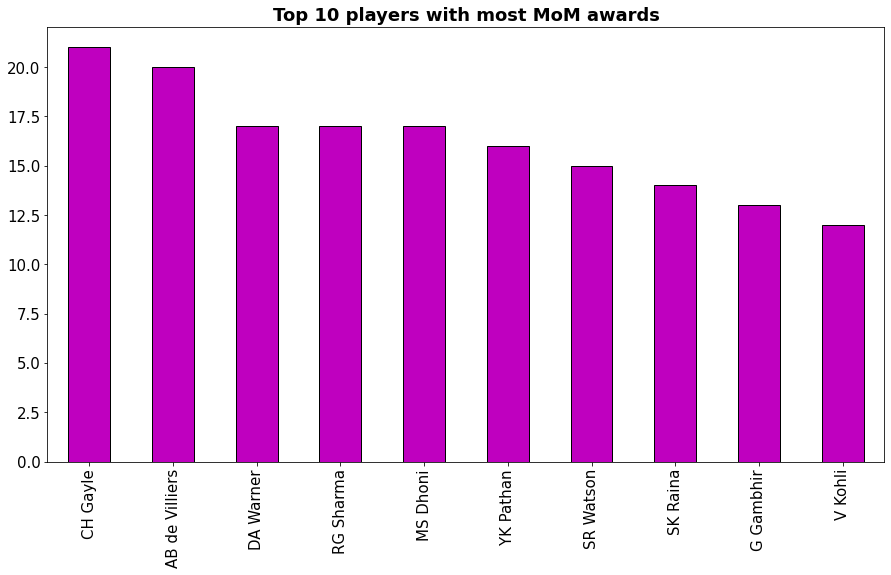

In [31]:
matches['player_of_match'].value_counts().head(10).plot(kind = 'bar', fontsize=15, color='m',edgecolor='black')
plt.title("Top 10 players with most MoM awards",fontsize=18,fontweight="bold")
plt.show()

* Chris Gayle , Ab de Villiers , Rohit Sharma , MS Dhoni , David Warner are top-5 players of IPL that contributes most in winning matches

## Stadium present in each cities

In [32]:
city_venue = matches.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df.head(10)

season
city         venue                                                     
Abu Dhabi    Sheikh Zayed Stadium                                     7
Ahmedabad    Sardar Patel Stadium, Motera                            12
Bangalore    M Chinnaswamy Stadium                                   63
Bengaluru    M Chinnaswamy Stadium                                    7
             M. Chinnaswamy Stadium                                   6
Bloemfontein OUTsurance Oval                                          2
Cape Town    Newlands                                                 7
Centurion    SuperSport Park                                         12
Chandigarh   Punjab Cricket Association IS Bindra Stadium, M...      11
             Punjab Cricket Association Stadium, Mohali              35

## Venue which has hosted most number of IPL matches

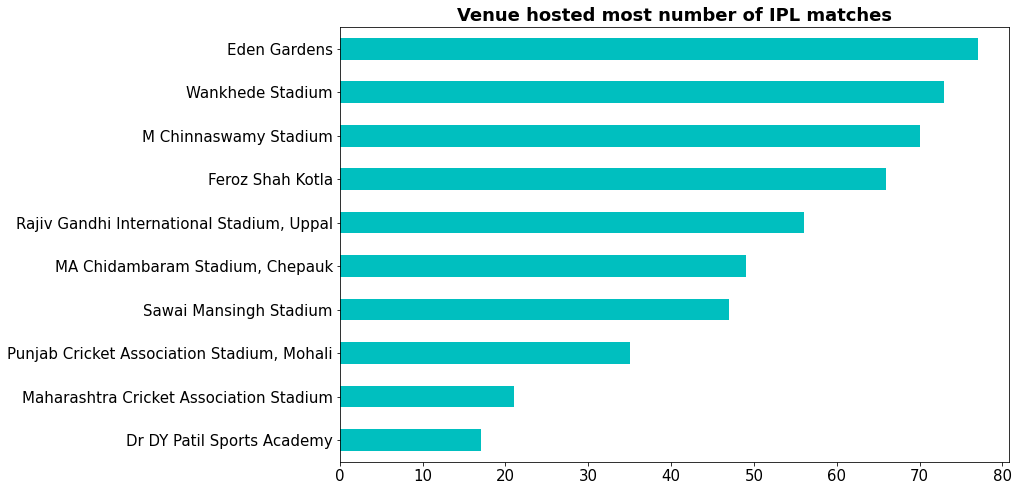

In [33]:
matches["venue"].value_counts().sort_values(ascending = True).tail(10).plot(kind = 'barh',figsize=(12,8), fontsize=15, color='c')
plt.title("Venue hosted most number of IPL matches",fontsize=18,fontweight="bold")
plt.show()

* Eden Gardens host the most number of matches followed by Wankhede Stadium.

##  Teams total scoring runs over the years?

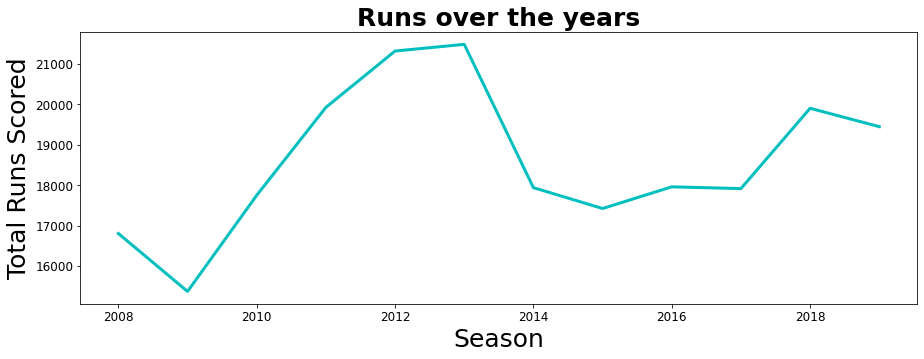

In [34]:
merge.groupby('season')['batsman_runs'].sum().plot(kind = 'line', linewidth = 3, figsize =(15,5),color = 'c')
                                                                                          
plt.title("Runs over the years",fontsize= 25, fontweight = 'bold')
plt.xlabel("Season", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

## Top Run Getters of IPL

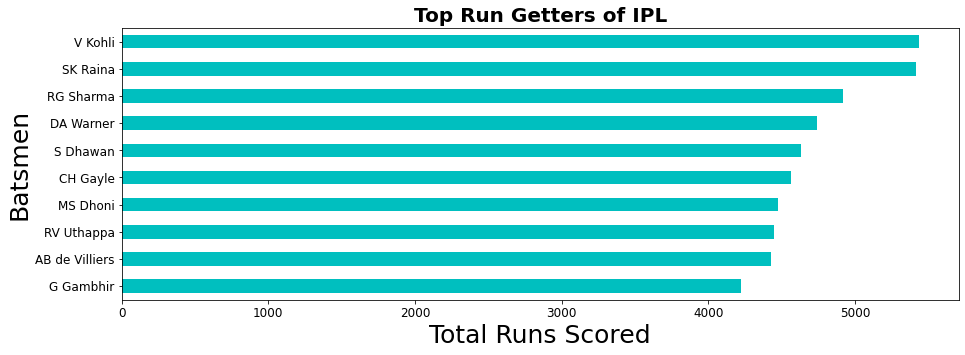

In [35]:
merge.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = True).tail(10).plot(kind = 'barh', color = 'c',
                                                                                            figsize = (15,5))
plt.title("Top Run Getters of IPL", fontsize = 20, fontweight = 'bold')
plt.ylabel("Batsmen", size = 25)
plt.xlabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

## Top Wicket Takers of IPL

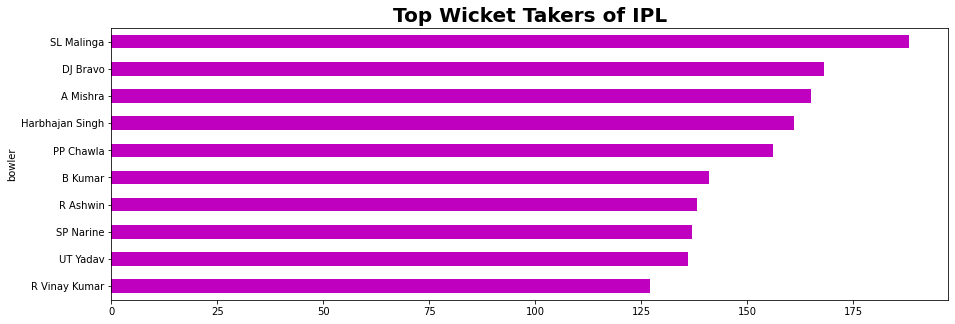

In [36]:
merge.groupby('bowler')['player_dismissed'].count().sort_values(ascending = True).tail(10).plot(kind = 'barh', 
                                                color = 'm', figsize = (15,5))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.show()

SL Malinga is the top wicket taker of IPL

## Top Fielders

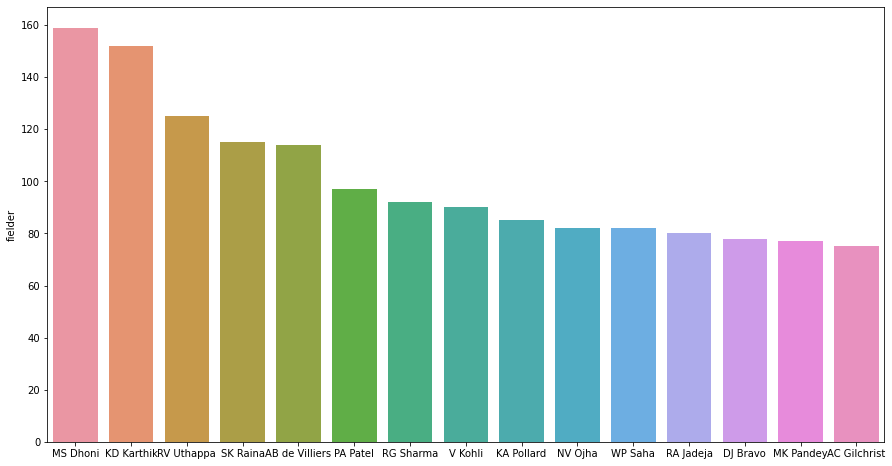

In [39]:
top_fielders = merge['fielder'].value_counts()[:15]

sns.barplot(x = top_fielders.index, y = top_fielders)

plt.show()

## Maximum Wide Balls

Text(0.5, 1.0, 'Most no. of Wide Balls by Bowler')

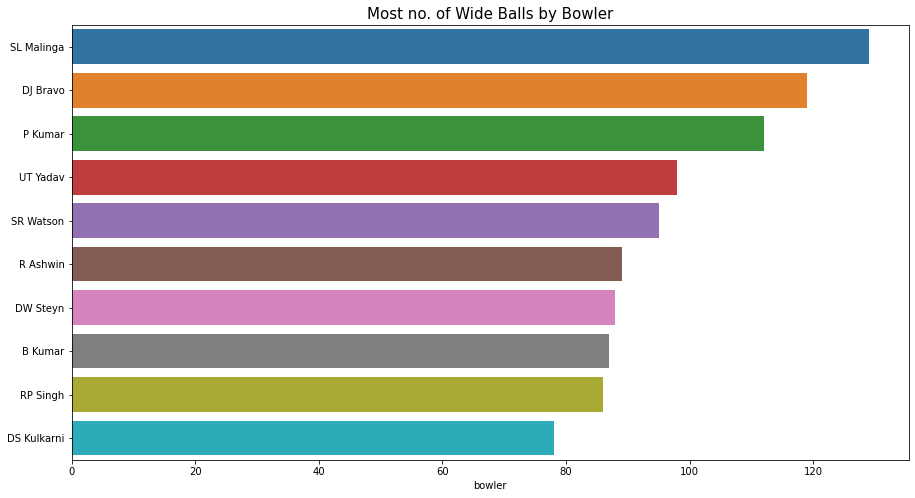

In [42]:
max_wide = deliveries[deliveries['wide_runs']!=0]['bowler'].value_counts()[:10]
sns.barplot(x = max_wide, y = max_wide.index)
plt.title("Most no. of Wide Balls by Bowler",fontsize=15)

## Maximum No Balls

Text(0.5, 1.0, 'Most no. of NO_Balls by Bowler')

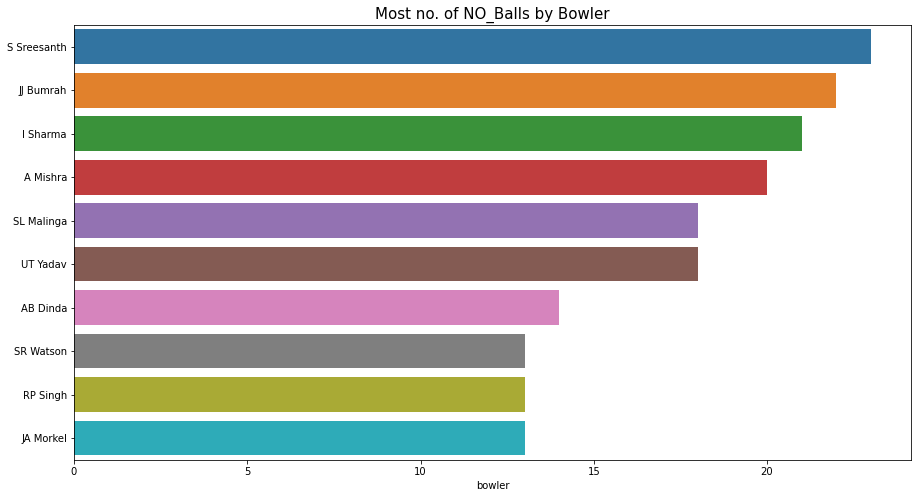

In [43]:
max_wide = deliveries[deliveries['noball_runs']!=0]['bowler'].value_counts()[:10]

sns.barplot(x = max_wide, y = max_wide.index)
plt.title("Most no. of NO_Balls by Bowler",fontsize=15)

## Maximum Leg_by runs

Text(0.5, 1.0, 'Most no. of NO_Balls by Bowler')

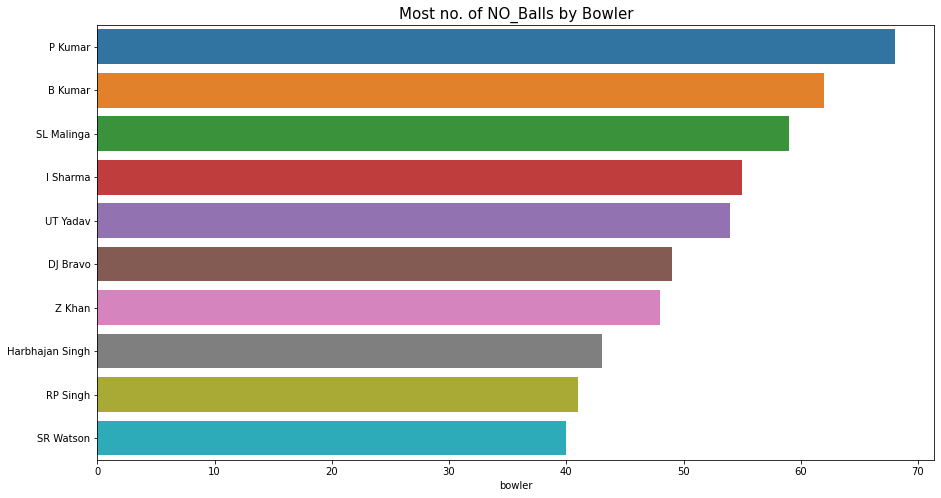

In [44]:
max_leg = deliveries[deliveries['legbye_runs']!=0]['bowler'].value_counts()[:10]
sns.barplot(x = max_leg, y = max_leg.index)
plt.title("Most no. of NO_Balls by Bowler",fontsize=15)

## Maximum Sixes

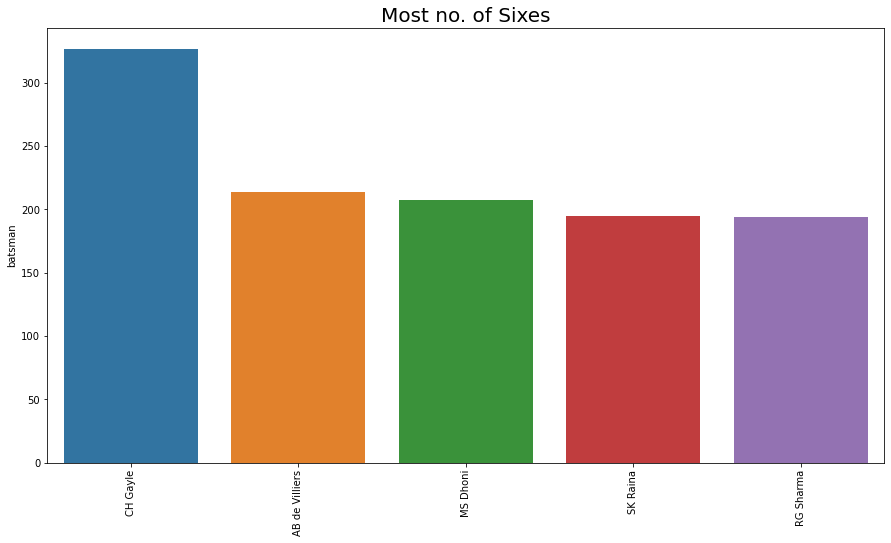

In [45]:
sixes = merge[merge['batsman_runs']==6]['batsman'].value_counts()[:5]

sns.barplot(x = sixes.index, y = sixes)
plt.xticks(rotation=90)
plt.title("Most no. of Sixes",fontsize=20)
plt.show()

* CG Gayle hits maximum number of sixes

## Inspecting Dismissal_Kind

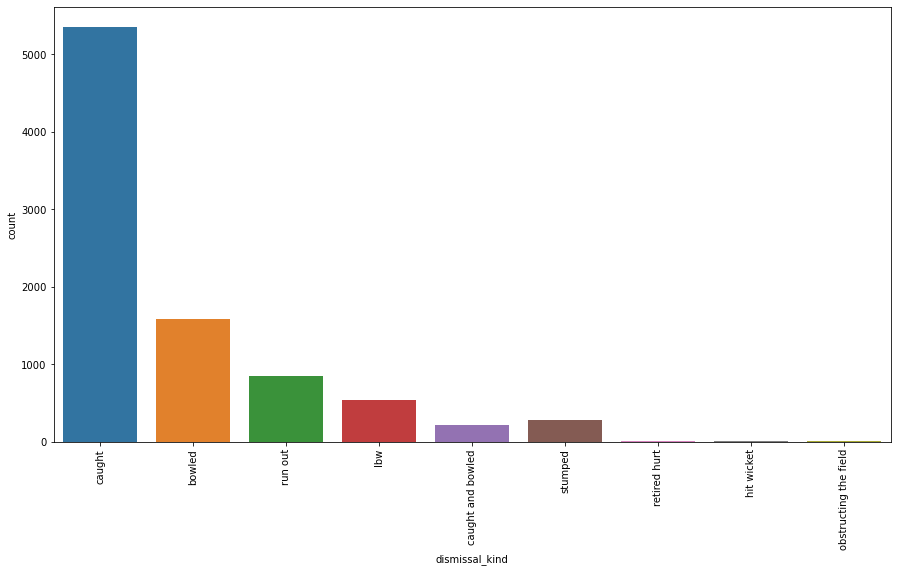

In [46]:
# Now let us see most common dismissal types in IPL.

sns.countplot(x='dismissal_kind', data=merge)
plt.xticks(rotation='vertical')
plt.show()

## Conclusion
As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

* Mumbai Indians is the most successful team in IPL and has won the most number of toss.
* There were more matches won by chasing the total(419 matches) than defending(350 matches).
* The Mumbai city has hosted the most number of IPL matches.
* Chris Gayle has won the maximum number of player of the match title.
* Eden Gardens has hosted the maximum number of IPL matches.



Suggest teams or players a company should endorse for its products.

* If the franchise is looking for a game changing batsman then go for Chris Gayle, AB deVillers, R Sharma , MS Dhoni...
* If the franchise is looking for a batsman who could score good amount of runs every match the go for DA Warner, CH Gayle, V Kohli,AB de Villiers,S Dhawan
* If the franchise need a wicket taking bowler then go for SL Malinga,DJ Bravo,A Mishra ,Harbhajan Singh, PP Chawla
* If the franchise need a bowler bowling most number of dot balls then go for Harbhajan Singh,SL Malinga,B Kumar,A Mishra,PP Chawla

# E N D